In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("mcdonalds.csv")

In [ ]:
def func(i):
  if str(i)=='Never':
    return 0
  elif str(i)=='Once a year':
    return 1
  elif str(i)=='Every three months':
    return 2
  elif str(i)=='Once a month':
    return 3
  elif str(i)=='Once a week':
    return 4
  elif str(i)=='More than once a week':
    return 5

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
list = ['yummy',	'convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap'	, 'tasty'	, 'expensive',	'healthy' ,	'disgusting']

In [ ]:
for i in list:
  df[i] = df[i].apply(lambda x: 1 if x=="Yes" else 0)
  


In [ ]:
df['Like'] = df['Like'].apply(lambda x:x[-1] if x=="I love it!+5" or "I hate it!-5" else int(x))

In [ ]:
df['Like'] = df['Like'].apply(pd.to_numeric)

In [ ]:
df['Gender'] = df['Gender'].apply(lambda x:  1 if x=="Male" else 0)

In [ ]:
df.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender
count,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000,1453.000000
mean,0.552650,0.907777,0.093599,0.867171,0.526497,0.900206,0.598761,0.644184,0.357880,0.198899,0.242946,2.757743,44.604955,0.457674
std,0.497391,0.289440,0.291371,0.339506,0.499469,0.299828,0.490318,0.478925,0.479542,0.399309,0.429010,1.645749,14.221178,0.498377
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000
25%,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,33.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,45.000000,0.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,57.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000


In [ ]:
list1 = ['yummy',	'convenient',	'spicy',	'fattening',	'greasy',	'fast',	'cheap'	, 'tasty'	, 'expensive',	'healthy' ,	'disgusting' , 'Gender']

In [ ]:
df['VisitFrequency'] = df['VisitFrequency'].astype(str)

In [ ]:
vfn = []

In [ ]:
for i in df['VisitFrequency']:
  vfn.append(func(i))


In [ ]:
df['VisitFrequencynum'] = vfn

In [ ]:
x = df.loc[:,list1].values

In [ ]:
x

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       [0, 1, 1, ..., 1, 0, 0],
       ...,
       [1, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 1]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc = pca.fit_transform(x)
pf = pd.DataFrame(data = pc
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
pf

,principal component 1,principal component 2
0,0.360699,-0.314246
1,-0.271777,0.288933
2,0.326076,0.610969
3,-0.239314,-0.439775
4,0.241102,-0.693957
...,...,...
1448,1.612038,0.310770
1449,-1.008625,-0.034596
1450,-0.225918,0.958570
1451,-1.098240,0.133613


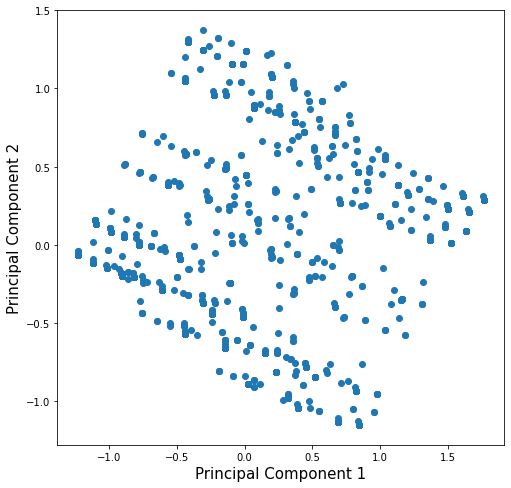

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.scatter(pf['principal component 1']
               , pf['principal component 2'])


In [ ]:
from sklearn.cluster import KMeans

Text(0, 0.5, 'WCSS')

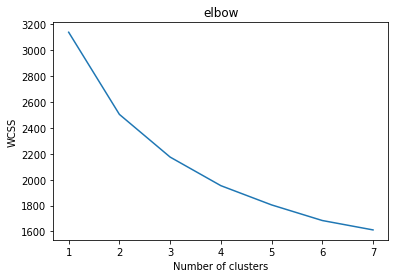

In [ ]:
wcss=[]
for i in range(1,8):
 kmeans = KMeans(i)
 kmeans.fit(x)
 wcss_iter = kmeans.inertia_
 wcss.append(wcss_iter)

number_clusters = range(1,8)
plt.plot(number_clusters,wcss)
plt.title('elbow')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

using k = 4

In [ ]:
kmeans = KMeans(4)
kmeans.fit(x)

KMeans(n_clusters=4)

In [ ]:
kmeansp = kmeans.predict(x)

In [ ]:
labels = kmeans.labels_
print(labels[:100])

[1 0 0 2 1 2 0 2 3 0 1 0 1 0 3 2 2 0 3 0 0 0 0 0 2 0 2 1 1 2 2 2 2 1 2 1 2
 1 1 3 0 2 2 2 1 0 2 0 2 2 3 1 0 3 2 1 1 1 2 2 0 2 2 3 2 3 3 0 2 2 1 2 0 1
 2 3 2 3 0 2 3 1 1 2 3 2 0 0 0 0 2 2 3 1 2 0 1 1 3 2]


In [ ]:
df['cluster_num'] = labels

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum,cluster_num
0,0,1,0,1,0,1,1,0,1,0,0,3,61,Every three months,0,2,1
1,1,1,0,1,1,1,1,1,1,0,0,2,51,Every three months,0,2,0
2,0,1,1,1,1,1,0,1,1,1,0,1,62,Every three months,0,2,0
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,Once a month,1,3,1


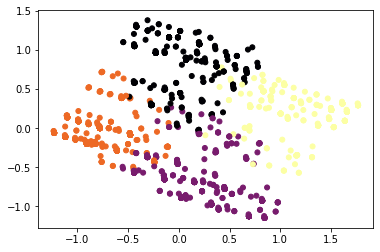

In [ ]:
plt.scatter(pf['principal component 1'], pf['principal component 2'], c=kmeansp, s=25, cmap='inferno')

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

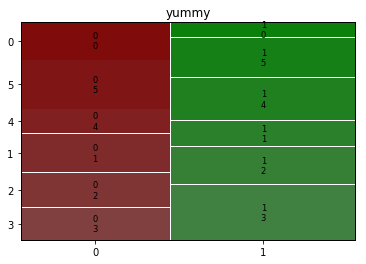

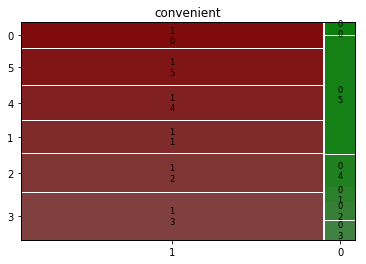

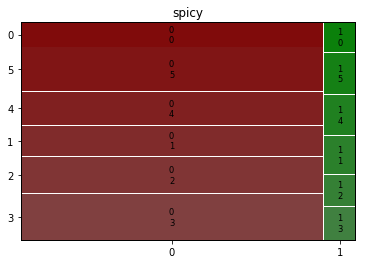

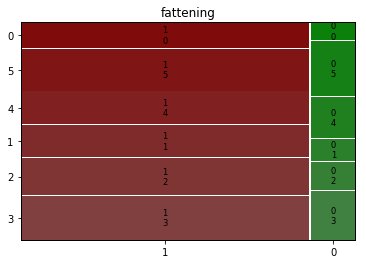

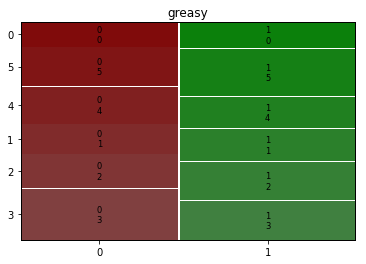

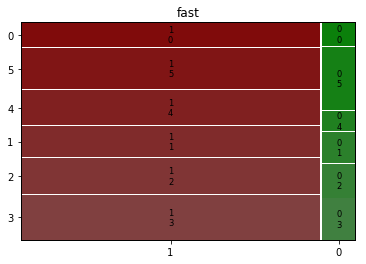

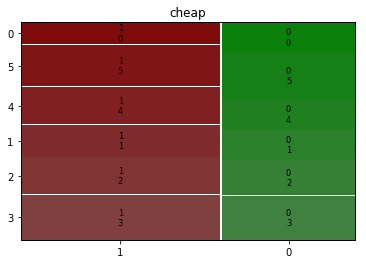

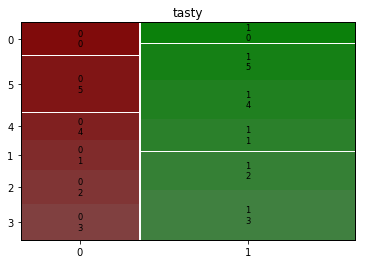

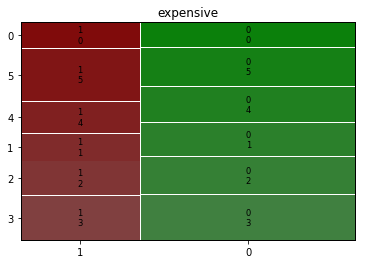

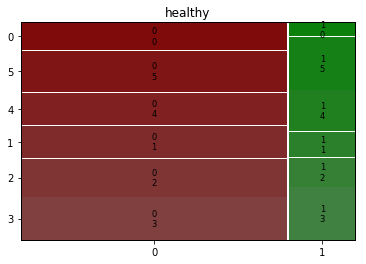

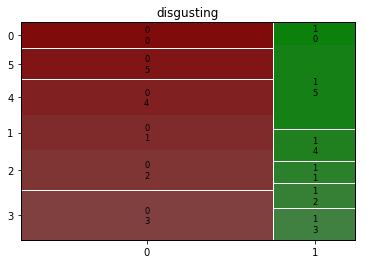

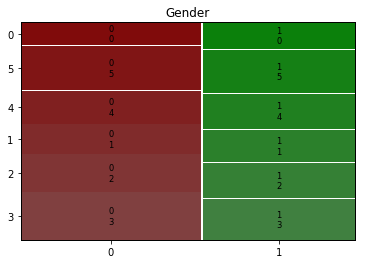

In [ ]:
for i in list1:

  mosaic(df,[i , 'Like'],title = i)
  plt.show()

In [ ]:
m2  = df.groupby(df['cluster_num'])
m2.mean()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,
0,0.885449,0.965944,0.130031,0.900929,0.575851,0.854489,0.108359,0.919505,0.894737,0.201238,0.108359,2.643963,40.284830,0.547988,2.851393
1,0.018568,0.907162,0.087533,0.909814,0.583554,0.949602,0.883289,0.299735,0.013263,0.074271,0.323607,2.238727,49.482759,0.408488,1.697613
2,0.980583,0.980583,0.083495,0.788350,0.365049,0.961165,0.941748,0.980583,0.015534,0.351456,0.046602,3.050485,42.429126,0.372816,3.023301
3,0.021008,0.672269,0.075630,0.924370,0.718487,0.752101,0.071429,0.088235,0.915966,0.063025,0.722689,3.100840,47.449580,0.596639,1.449580


In [ ]:
m2.max()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,5
1,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,4
2,1,1,1,1,1,1,1,1,1,1,1,5,71,Once a year,1,5
3,1,1,1,1,1,1,1,1,1,1,1,5,70,Once a year,1,5


In [ ]:
m2.min()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum
cluster_num,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,18,Every three months,0,0


0         AxesSubplot(0.1,0.559091;0.363636x0.340909)
1    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
2             AxesSubplot(0.1,0.15;0.363636x0.340909)
3        AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

<Figure size 576x576 with 0 Axes>

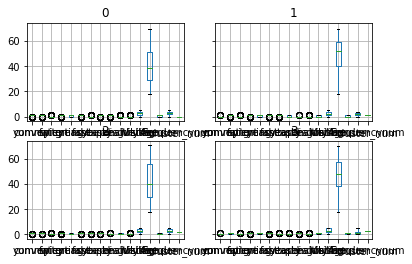

In [ ]:
plt.figure(figsize=(8,8))
m2.boxplot()

cluster_num
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
3    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

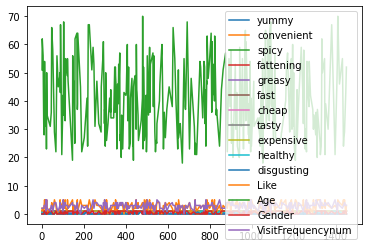

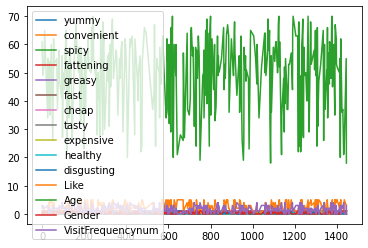

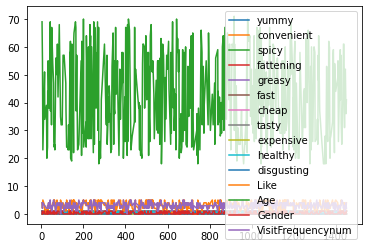

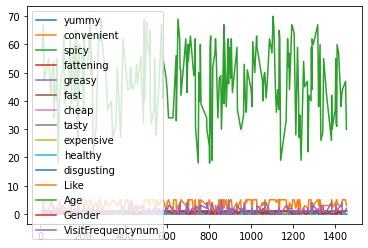

In [ ]:
m2.plot()

cluster_num
0    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
1    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
2    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
3    [[AxesSubplot(0.125,0.725918;0.158163x0.154082...
dtype: object

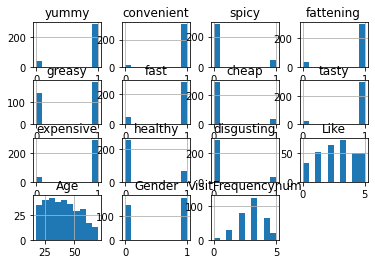

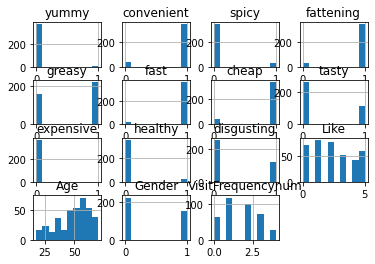

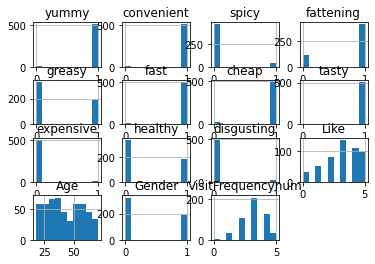

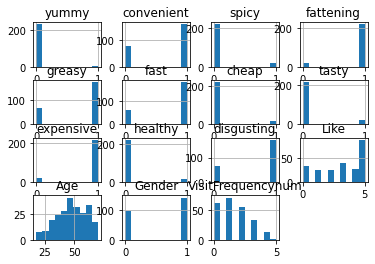

In [ ]:
m2.hist()

In [ ]:
m2.Like.mean()

cluster_num
0    2.643963
1    2.238727
2    3.050485
3    3.100840
Name: Like, dtype: float64

In [ ]:
m2.VisitFrequencynum.mean()

cluster_num
0    2.851393
1    1.697613
2    3.023301
3    1.449580
Name: VisitFrequencynum, dtype: float64

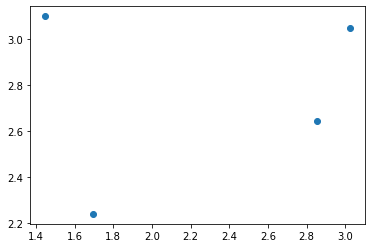

In [ ]:
plt.scatter(m2.VisitFrequencynum.mean(),m2.Like.mean())

In [ ]:
dff = df.loc[df['cluster_num']==2]

In [ ]:
dff

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,VisitFrequencynum,cluster_num
3,1,1,0,1,1,1,1,1,0,0,1,4,69,Once a week,0,4,2
5,1,1,0,1,0,1,1,1,0,0,0,2,55,Every three months,1,2,2
7,1,1,0,1,1,1,1,1,0,0,0,5,23,Once a week,0,4,2
15,1,1,0,1,0,1,1,1,0,0,0,3,51,Once a month,1,3,2
16,1,1,0,1,1,1,1,1,0,0,0,0,34,Once a month,0,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1442,1,1,0,0,1,1,1,1,0,0,0,4,31,Once a month,1,3,2
1443,1,1,0,1,0,1,1,1,0,0,0,2,50,Once a year,0,1,2
1446,1,1,0,1,1,1,1,1,0,1,0,1,52,Every three months,0,2,2
1449,1,1,0,1,0,0,1,1,0,1,0,2,36,Once a week,0,4,2


In [ ]:
dff.describe()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,Gender,VisitFrequencynum,cluster_num
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.0
mean,0.980583,0.980583,0.083495,0.788350,0.365049,0.961165,0.941748,0.980583,0.015534,0.351456,0.046602,3.050485,42.429126,0.372816,3.023301,2.0
std,0.138121,0.138121,0.276898,0.408876,0.481912,0.193389,0.234448,0.138121,0.123784,0.477889,0.210990,1.455359,14.954026,0.484024,1.013259,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,30.000000,0.000000,2.000000,2.0
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,40.000000,0.000000,3.000000,2.0
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,4.000000,56.000000,1.000000,4.000000,2.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,71.000000,1.000000,5.000000,2.0


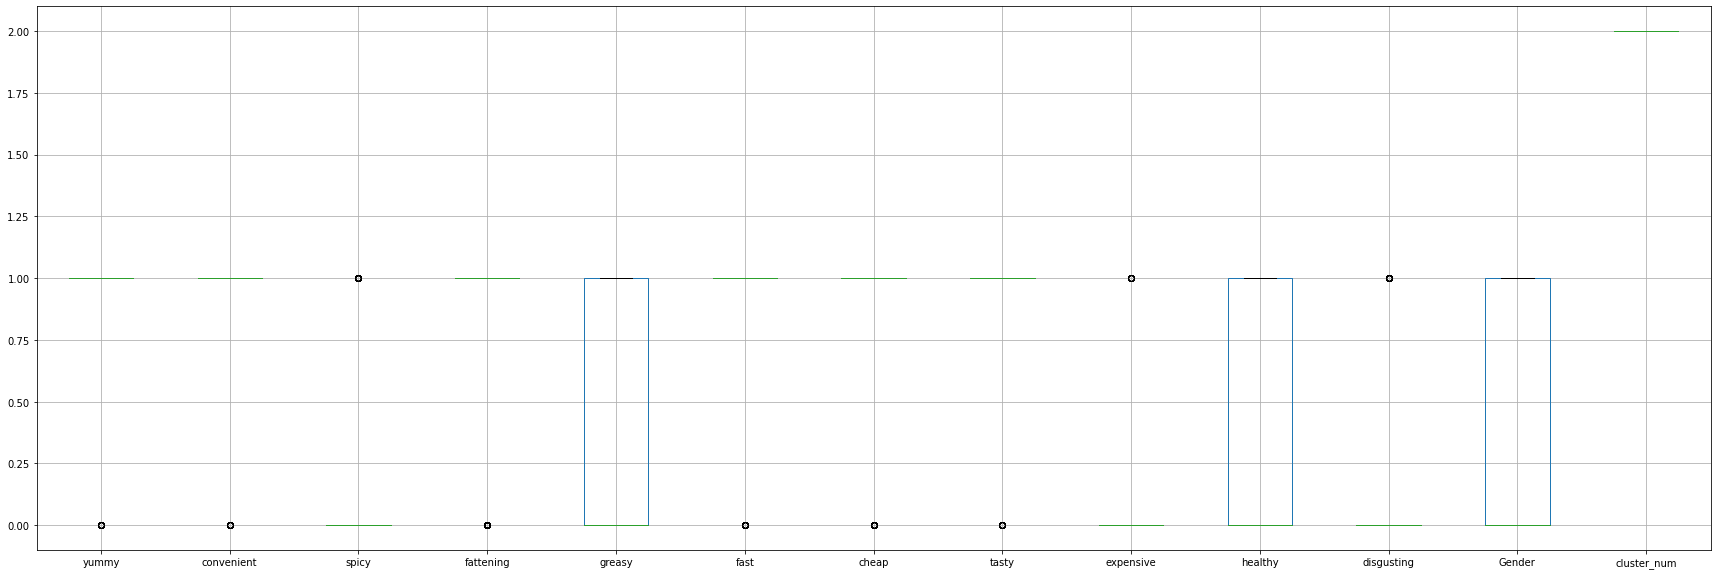

In [ ]:
dff2 = dff.drop(['Age','Like','VisitFrequencynum'], axis = 1)
plt.figure(figsize = (30,10))
dff2.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb7f1bb2990>,
      dtype=object)

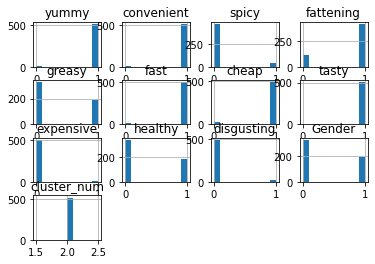

In [ ]:
dff2.hist()